In [1]:
# USE 'BASE' ENVIRONMENT

import numpy as np
import pandas as pd
from statsmodels.stats.proportion import proportions_ztest

In [2]:
taus = [0.0005, 0.001, 0.002, 0.005, 0.01, 0.02, 0.05, 0.1, 0.15, 0.2]

In [21]:
def get_stats(taus, batch_str):
    stat_dfs = []
    for tau in taus:
        tau_str = str(tau).replace(".", "_")
        # input_path = r"../scores/taus/" + f'tau_{tau_str}/scores_{tau_str}{batch_str}.csv'
        input_path = r"../scores/taus/" + f'tau_{tau_str}/scores_11_stocks__{tau_str}{batch_str}.csv'
        df = pd.read_csv(input_path, index_col = 0)
        df = df.iloc[:-1]                               # LAST ROW HAS BROKEN VALUES
        stats = pd.DataFrame()
        means = []
        stds = []
        percentiles_5 = []
        percentiles_95 = []
        for col in df.columns:
            means.append(df[col].mean())
            stds.append(df[col].std())
            percentiles_5.append(np.percentile(df[col], 5))
            percentiles_95.append(np.percentile(df[col], 95))
        stats[f"Models"] = df.columns.to_list()
        stats["MEAN"] = means
        stats[f"STD"] = stds
        stats[f"5th PERCENTIL"] = percentiles_5
        stats[f"95th PERCENTIL"] = percentiles_95
        stats.sort_values(by="MEAN", inplace=True)
        stat_dfs.append(stats)
    return stat_dfs

In [53]:
stats_1 = get_stats(taus, "")
# stats_2 = get_stats(taus, "_2nd_iter")
tau_index = 3

In [54]:
stats_1[tau_index][stats_1[tau_index]["Models"].str.contains("val")]

,Models,MEAN,STD,5th PERCENTIL,95th PERCENTIL
0,clayton_random+gauss_dist+val,-0.003678,0.002393,-0.006312,-0.000495
2,clayton_random+t_dist+val,-0.003277,0.002078,-0.005676,-0.000497
8,t_student+gauss_dist+val,-0.001814,0.000979,-0.003228,-0.000497
4,gaussian+gauss_dist+val,-0.001641,0.000938,-0.002944,-0.000495
10,t_student+t_dist+val,-0.001620,0.000827,-0.002818,-0.000499
6,gaussian+t_dist+val,-0.001423,0.000760,-0.002484,-0.000496


In [46]:
# stats_2[tau_index][stats_2[tau_index]["Models"].str.contains("val")]

In [32]:
stat_dfs = []
dfs = []
batch_str = ""
for tau in taus:
    tau_str = str(tau).replace(".", "_")
    input_path = r"../scores/taus/" + f'tau_{tau_str}/scores_11_stocks__{tau_str}{batch_str}.csv'
    df = pd.read_csv(input_path, index_col = 0)
    df = df.iloc[:-1]                               # LAST ROW HAS BROKEN VALUES
    dfs.append(df)
    stats = pd.DataFrame()
    means = []
    stds = []
    percentiles_5 = []
    percentiles_95 = []
    for col in df.columns:
        means.append(df[col].mean())
        stds.append(df[col].std())
        percentiles_5.append(np.percentile(df[col], 5))
        percentiles_95.append(np.percentile(df[col], 95))
    stats[f"Models"] = df.columns.to_list()
    stats["MEAN"] = means
    stats[f"STD"] = stds
    stats[f"5th PERCENTIL"] = percentiles_5
    stats[f"95th PERCENTIL"] = percentiles_95
    stats.sort_values(by="MEAN", inplace=True)
    stat_dfs.append(stats)

In [55]:
tau_idx = 5
data = dfs[tau_idx]
a, b = -0.005, 0
p_value_threshold = 0.05
val_columns = [col for col in data.columns if "val" in col]

results = []

for col in val_columns:
    in_range_count = ((data[col] >= a) & (data[col] <= b)).sum()
    total_count = len(data[col])
    observed_proportion = in_range_count / total_count

    expected_proportion = 1.0

    stat, p_value = proportions_ztest(in_range_count, total_count, value=expected_proportion)

    results.append({
        "Column": col,
        "Observed Proportion": observed_proportion,
        "P-Value": p_value,
        "Reject H0": p_value < p_value_threshold
    })

results_df = pd.DataFrame(results)
results_df

,Column,Observed Proportion,P-Value,Reject H0
0,clayton_random+gauss_dist+val,0.396825,1.296898e-22,True
1,clayton_random+t_dist+val,0.396825,1.296898e-22,True
2,gaussian+gauss_dist+val,0.952381,7.592696e-02,False
3,gaussian+t_dist+val,0.984127,3.134390e-01,False
4,t_student+gauss_dist+val,0.920635,1.978196e-02,True
5,t_student+t_dist+val,0.984127,3.134390e-01,False


In [6]:
dfs[0]

,clayton_random+gauss_dist+val,clayton_random+gauss_dist+score,clayton_random+t_dist+val,clayton_random+t_dist+scor,gaussian+gauss_dist+val,gaussian+gauss_dist+score,gaussian+t_dist+val,gaussian+t_dist+scor,t_student+gauss_dist+val,t_student+gauss_dist+score,t_student+t_dist+val,t_student+t_dist+scor
0,-0.011925,0.000005,-0.011044,0.000004,-0.008776,0.000004,-0.008105,0.000004,-0.012446,0.000005,-0.011442,0.000005
1,-0.009316,0.000004,-0.008444,0.000004,-0.006140,0.000004,-0.005437,0.000004,-0.009477,0.000005,-0.008418,0.000004
2,-0.009213,0.000004,-0.008371,0.000004,-0.006163,0.000004,-0.005416,0.000004,-0.009645,0.000005,-0.008593,0.000004
3,-0.006242,0.000004,-0.005660,0.000004,-0.003315,0.000004,-0.002882,0.000003,-0.006805,0.000005,-0.006044,0.000004
4,-0.006113,0.000004,-0.005496,0.000004,-0.002765,0.000003,-0.002293,0.000003,-0.006670,0.000005,-0.005829,0.000004
...,...,...,...,...,...,...,...,...,...,...,...,...
58,-0.000061,0.000008,-0.000065,0.000009,-0.000061,0.000008,-0.000065,0.000009,-0.000061,0.000008,-0.000065,0.000009
59,-0.000060,0.000008,-0.000065,0.000009,-0.000059,0.000008,-0.000065,0.000009,-0.000060,0.000008,-0.000065,0.000009
60,-0.000065,0.000009,-0.000065,0.000009,-0.000065,0.000009,-0.000065,0.000009,-0.000065,0.000009,-0.000065,0.000009
61,-0.000061,0.000008,-0.000061,0.000008,-0.000061,0.000008,-0.000061,0.000008,-0.000061,0.000008,-0.000061,0.000008


In [ ]:
data = pd.read_clipboard()  # Wczytanie danych z tabeli
a, b = -0.01, 0  # Domyślny zakres
p_value_threshold = 0.05  # Poziom istotności

# Filtruj kolumny zawierające "val"
val_columns = [col for col in data.columns if "val" in col]

# Wyniki
results = []

for col in val_columns:
    # Liczba obserwacji w przedziale
    in_range_count = ((data[col] >= a) & (data[col] <= b)).sum()
    total_count = len(data[col])
    observed_proportion = in_range_count / total_count

    # Oczekiwana proporcja (np. 100% w przedziale)
    expected_proportion = 1.0  # Możesz zmienić według założeń
    # Test proporcji
    stat, p_value = proportions_ztest(in_range_count, total_count, value=expected_proportion)

    # Zapis wyników
    results.append({
        "Column": col,
        "Observed Proportion": observed_proportion,
        "P-Value": p_value,
        "Reject H0": p_value < p_value_threshold
    })

# Wyświetlenie wyników
results_df = pd.DataFrame(results)

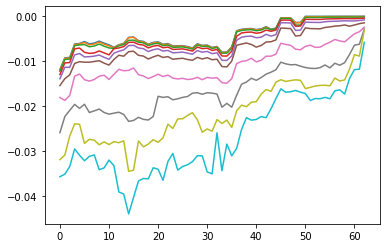

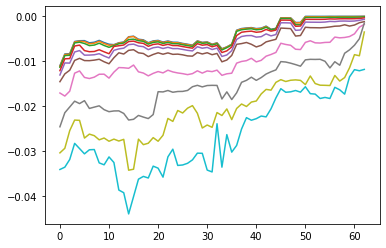

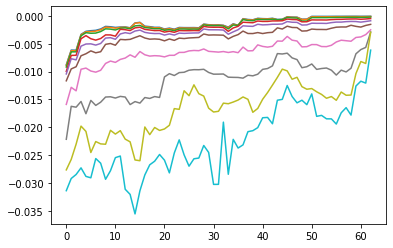

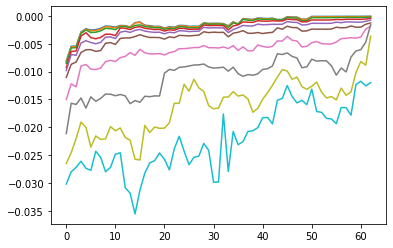

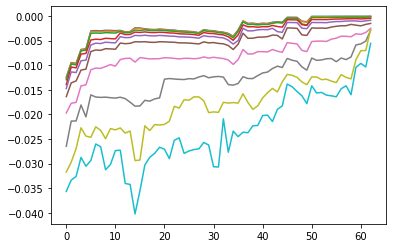

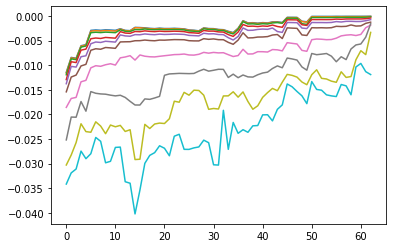

In [104]:
from matplotlib import pyplot as plt
for model_idx in range(12):
    if model_idx % 2 == 0:
        for i in range(10):
            plt.plot(dfs[i].iloc[:,model_idx])
        plt.show()